Linkedin: [Keshabkjha](https://www.linkedin.com/in/keshabkjha/)

# Employee Burnout Prediction


Employee burnout is a state of physical, emotional and mental exhaustion caused by excessive and prolonged stress. It can have serious consequences on an individual's well-being and can lead to decreased productivity and job performance. In today's fast-paced and constantly connected world, it is increasingly important to recognize and address the signs of burnout in order to maintain the health and well-being of employees.

As part of the final project for the 6 Weeks Internship Program with SkillsBuild and Edunet, conducted by the Edunet Foundation in collaboration with AICTE, we will be exploring the use of regression techniques to predict employee burnout. By analyzing a dataset containing various factors that may contribute to burnout such as workload, mental fatigue job and work-life balance, we can develop a model to identify individuals who may be at risk of burnout. By proactively addressing these risk factors, organizations can help prevent burnout and promote the well-being of their employees.

## Dataset: Are Your Employees Burning Out?
This [dataset](https://www.kaggle.com/datasets/blurredmachine/are-your-employees-burning-out?select=train.csv) consists of 9 columns as follows:

* **Employee ID**: The unique ID allocated for each employee **(example: fffe390032003000)**
* **Date of Joining**: The date-time when the employee has joined the organization **(example: 2008-12-30)**
* **Gender**: The gender of the employee **(Male/Female)**
* **Company Type**: The type of company where the employee is working **(Service/Product)**
* **WFH Setup Available**: Is the work from home facility available for the employee **(Yes/No)**
* **Designation**: The designation of the employee of work in the organization.
In the **range of [0.0, 5.0]** bigger is higher designation.
* **Resource Allocation**: The amount of resource allocated to the employee to work, ie. number of working hours.
In the **range of [1.0, 10.0]** (higher means more resource)
* **Mental Fatigue Score**: The level of fatigue mentally the employee is facing.
In the **range of [0.0, 10.0]** where 0.0 means no fatigue and 10.0 means completely fatigue.
* **Burn Rate**: The value we need to predict for each employee telling the rate of Bur out while working.
In the **range of [0.0, 1.0]** where the higher the value is more is the burn out.

## Exploratory Data Analysis

Exploratory data analysis (EDA) is an important step in the machine learning process, as it allows us to gain insights into the characteristics and patterns of our data.

For this, we need first to load the data:

In [1]:
import warnings

def _warn(*argv, **kwargs):
    pass

warnings.warn = _warn

import pandas as pd
pd.options.mode.chained_assignment = None

df = pd.read_csv("/kaggle/input/employee-burnout-dataset/employee_burnout_analysis-AI 2.xlsx")

# Remove spaces in columns names for accessing by properties
df.columns = [c.replace(' ', '_') for c in df.columns]

# Remove Employee ID on dataframe showed
df.head()

,Employee_ID,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


As the table shows, this dataframe contains 22750 columns where each one represents an observation of our true data. Also, as we can see in the column "Mental Fatigue Score" there are also NaN values. Let's count them.

### NaN values

In [2]:
df.isna().sum()

Employee_ID                0
Date_of_Joining            0
Gender                     0
Company_Type               0
WFH_Setup_Available        0
Designation                0
Resource_Allocation     1381
Mental_Fatigue_Score    2117
Burn_Rate               1124
dtype: int64

There are NaN values on our target ("Burn Rate") and also in the last two columns. As we are going to perform supervised linear regression, our target variable is needed to do so. Therefore, this 1124 rows with NaN values must be dropped off of our dataframe.

Furthermore, the other columns with NaN values, prior to any analysis, seem to have an important relation with the target. This can be appreciated computing the pearson correlation.

In [3]:
df.corr().Burn_Rate[:-1]

Designation             0.737556
Resource_Allocation     0.856278
Mental_Fatigue_Score    0.944546
Name: Burn_Rate, dtype: float64

As we said, this variables are strongly correlated with our target and, therefore, important to estimate it. This correlation can also be seen plotting the relationship within the variables.

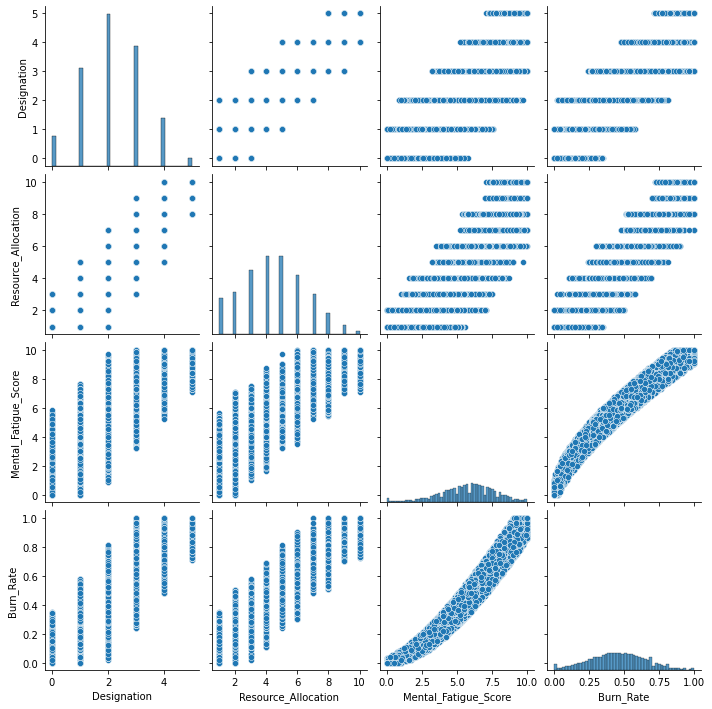

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(df)

For all this, in this case, we will drop off all observations with NaN values of our dataframe.

In [5]:
df = df.dropna()
len(df)

18590

Now we have 18590 entries instead of 22750. The next thing we are going to do is to analyze what type of data is each variable.

### Categorical features

In [6]:
df.dtypes

Employee_ID              object
Date_of_Joining          object
Gender                   object
Company_Type             object
WFH_Setup_Available      object
Designation             float64
Resource_Allocation     float64
Mental_Fatigue_Score    float64
Burn_Rate               float64
dtype: object

As we see, the first 5 columns have non-numeric values that have to be treated. Before this, let's see what are the values that each variable contains.

In [7]:
from pprint import pprint
df_obj = df.select_dtypes(object)

# prints a dictionary of max 10 unique values for each non-numeric column
pprint({ c : df_obj[c].unique()[:10] for c in df_obj.columns})

{'Company_Type': array(['Service', 'Product'], dtype=object),
 'Date_of_Joining': array(['2008-09-30', '2008-11-30', '2008-11-03', '2008-07-24',
       '2008-11-26', '2008-01-02', '2008-10-31', '2008-03-16',
       '2008-05-12', '2008-05-14'], dtype=object),
 'Employee_ID': array(['fffe32003000360033003200', 'fffe3700360033003500',
       'fffe32003400380032003900', 'fffe31003900340031003600',
       'fffe3300350037003500', 'fffe33003300340039003100',
       'fffe32003600320037003400', 'fffe33003100330032003700',
       'fffe3400310035003800', 'fffe33003100330036003300'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'WFH_Setup_Available': array(['No', 'Yes'], dtype=object)}


As we see, we have categorical values for columns 'Company_Type', 'Gender', 'WFH_Setup_Available', specifically binary classes that we'll treat later. Also we have the IDs of the employees, which doesn't provide any useful information and, therefore, they must be dropped. 

In [8]:
df = df.drop("Employee_ID", axis=1)
df.head().T

,0,1,3,4,5
Date_of_Joining,2008-09-30,2008-11-30,2008-11-03,2008-07-24,2008-11-26
Gender,Female,Male,Male,Female,Male
Company_Type,Service,Service,Service,Service,Product
WFH_Setup_Available,No,Yes,Yes,No,Yes
Designation,2.0,1.0,1.0,3.0,2.0
Resource_Allocation,3.0,2.0,1.0,7.0,4.0
Mental_Fatigue_Score,3.8,5.0,2.6,6.9,3.6
Burn_Rate,0.16,0.36,0.2,0.52,0.29


Finally, we have 'Date_of_Joining' which contains dates on year 2008.

Prior to any analysis, the date of joining doesn't seem that could have a direct relationship with our target. So, before discarding it, let's first transform this variable into another numeric one with which to analyze if it has any correlation with our target variable.

For this, let's see first its data distribution.

Min date 2008-01-01
Max date 2008-12-31


<AxesSubplot:xlabel='Month', ylabel='Hired employees'>

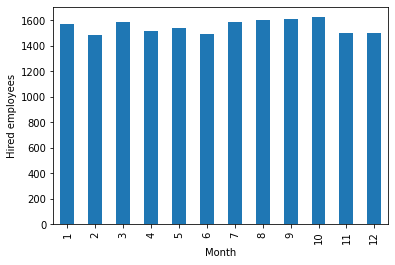

In [9]:
import numpy as np

print(f"Min date {df.Date_of_Joining.min()}")
print(f"Max date {df.Date_of_Joining.max()}")
df_month = df.copy()

df_month["Date_of_Joining"] = df_month.Date_of_Joining.astype("datetime64")
df_month.Date_of_Joining.groupby(
        df_month.Date_of_Joining.dt.month
    ).count().plot(kind="bar", xlabel='Month', ylabel = "Hired employees")


As we see, the date of joining is uniform distributed with values between 2008-01-01 and 2008-12-31. So in order to create a new feature which represents the labor seniority, we could create a variable with de days worked. But, since we don't have the information of when this observations are made, let's first parse the date to the day of the year when the employee was hired and see if there is any correlation with our target data.

For this, we will count the days from 2008-01-01 until the date of joining:

In [10]:
dt_2008 = pd.to_datetime(["2008-01-01"]*len(df))
df["Days"] = df.Date_of_Joining.astype("datetime64").sub(dt_2008).dt.days
df.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

Now, as we did before, let's perform the pearson correlation again.

In [11]:
df.corr().Burn_Rate[df.select_dtypes(exclude=object).columns != "Burn_Rate"]

Designation             0.736412
Resource_Allocation     0.855005
Mental_Fatigue_Score    0.944389
Days                    0.000309
Name: Burn_Rate, dtype: float64

As we see, the day of the year when the employee was hired doesn't have any correlation with our target. So in this case, rather than creating features from the original date of joining variable, we will prescind of it.

In [12]:
df = df.drop(["Date_of_Joining", "Days"], axis=1)
df.head().T

,0,1,3,4,5
Gender,Female,Male,Male,Female,Male
Company_Type,Service,Service,Service,Service,Product
WFH_Setup_Available,No,Yes,Yes,No,Yes
Designation,2.0,1.0,1.0,3.0,2.0
Resource_Allocation,3.0,2.0,1.0,7.0,4.0
Mental_Fatigue_Score,3.8,5.0,2.6,6.9,3.6
Burn_Rate,0.16,0.36,0.2,0.52,0.29


With respect to the categorical variables that we haven't treated yet, it's interesting to see first how its different classes are distributed and how they affect the other variables.

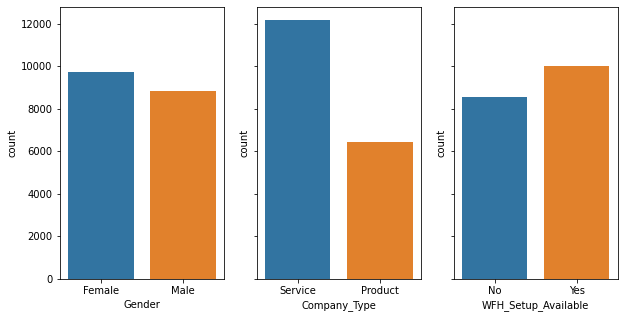

In [13]:
cat_columns = df.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10,5))
for i, c in enumerate(cat_columns):
    sns.countplot(df[c], ax=ax[i])
plt.show()

The number of observations of each category on each variable is equally distributed, except to the Company_Type where the number of service jobs its almost twice that of product ones.

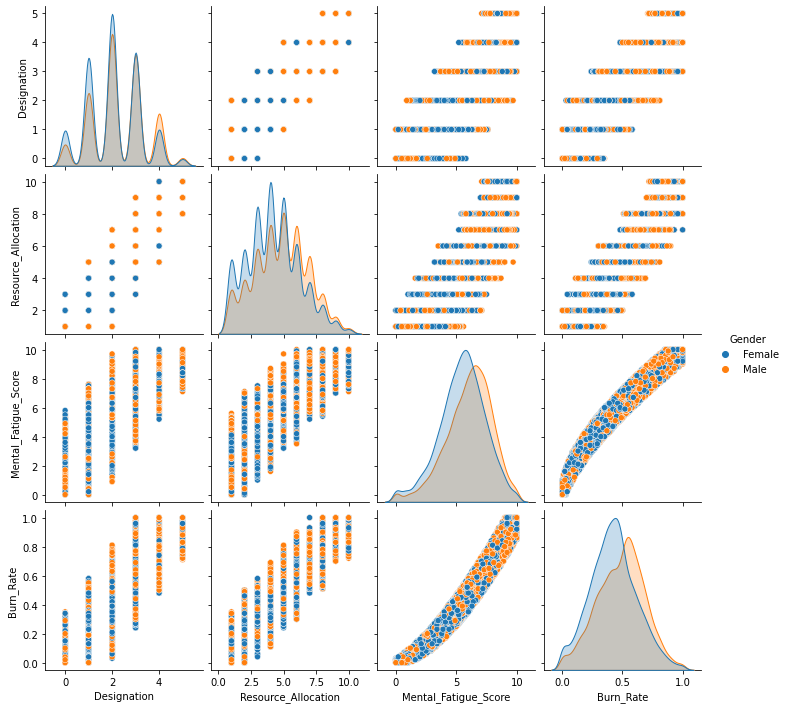

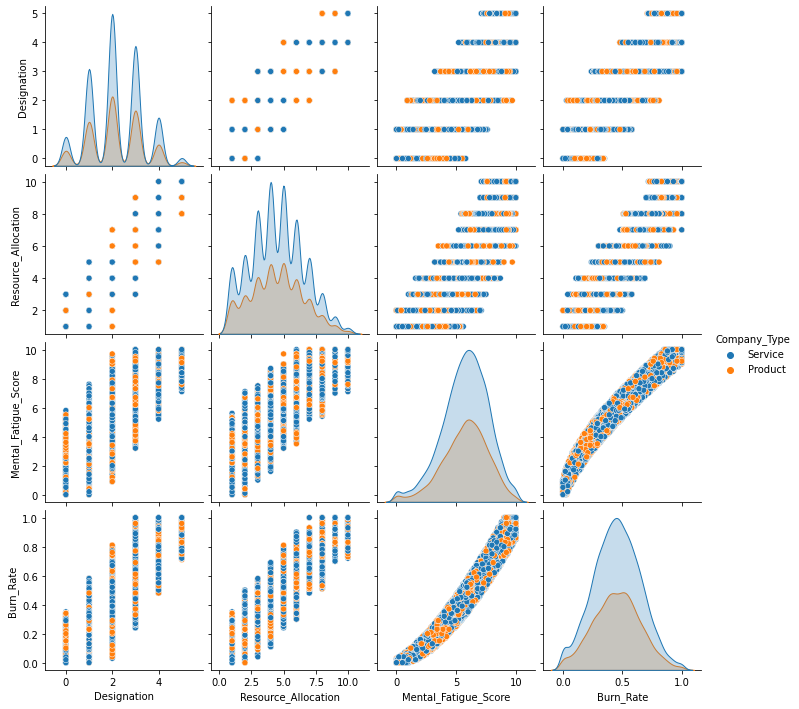

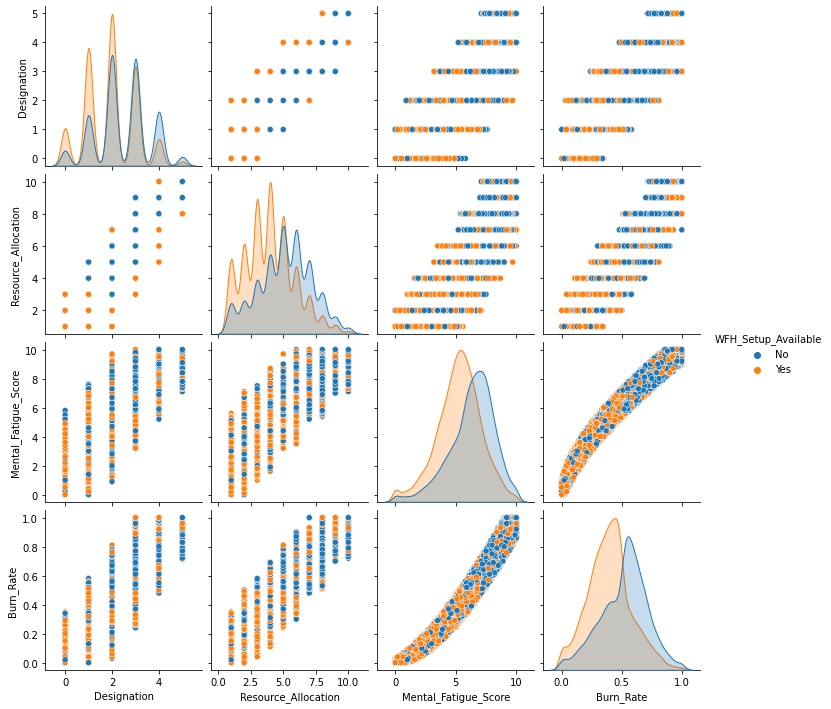

In [14]:
for c in df.select_dtypes(object).columns:
    sns.pairplot(df, hue=c)
plt.show()

As we can see, if working from home is available, the "Burn_Rate" and "Mental_Fatigue" tend to have lower values, but also in "Resource_Allocation". Same is slightly perceived when the gender of the employee is female.

Other things to considerate are that the distributions of the features and target are normally distributed and not skewed, which save them, specifically the target, of further treatment for fixing this. We can check this normality with the statistical test of normality based on D’Agostino and Pearson’s test:

In [15]:
from scipy.stats import normaltest

for c in df.select_dtypes(exclude=object):
    print(f"{c}: (p-value = {normaltest(df[c])[1]})")

Designation: (p-value = 7.799535630459232e-52)
Resource_Allocation: (p-value = 9.214167946666707e-96)
Mental_Fatigue_Score: (p-value = 6.8137251483124435e-124)
Burn_Rate: (p-value = 1.0375928238178144e-16)


We can say that the variables are normally distributed since all p-values<.05.

### One-Hot Encoding
Next, what we are going to do is to parse this classes to categorical values using the sparse representation with unit distance between classes known as one-hot encoding. Since all our categorical features are binary, and we don't want to represent multilinearity in our data, this classes can be represented with one dimension for each feature.

In [16]:
df = pd.get_dummies(df, columns=["Company_Type", "WFH_Setup_Available", "Gender"], drop_first=True)
df.head().T

,0,1,3,4,5
Designation,2.00,1.00,1.0,3.00,2.00
Resource_Allocation,3.00,2.00,1.0,7.00,4.00
Mental_Fatigue_Score,3.80,5.00,2.6,6.90,3.60
Burn_Rate,0.16,0.36,0.2,0.52,0.29
Company_Type_Service,1.00,1.00,1.0,1.00,0.00
WFH_Setup_Available_Yes,0.00,1.00,1.0,0.00,1.00
Gender_Male,0.00,1.00,1.0,0.00,1.00


Now, our dataframe doesn't have non-numeric values and all previous them are represented with just a numeric column.
Before continuing to use data pipelines and models to fit our data, we need first to split our dataframe in our input features X and target value y.

### X and y data

In [17]:
y_col = 'Burn_Rate'
df.columns
X = df[[c for c in df.columns if c != y_col]]
y = df[y_col]

print(X.shape)
print(y.shape)

(18590, 6)
(18590,)


## Pipeline models and Machine Learning

In this Section we will create data pipelines with models to find which one perform better on our data.
For this, we are going to first explain the process and components that we will use.

### Inference
The way that we are going to measure the performance of our models is using the [R² metric](https://en.wikipedia.org/wiki/Coefficient_of_determination).

Also, since we want also to fine-tune the hyperparameter our models to perform better on unseen data, we'll be using Cross Validation for this and also for selecting the best model.

About the models that we are going to use are:
* Linear Regression
* Lasso Regression
* Ridge Regression

The first one simply fits the parameters of the weighted sum of the input data that the linear function performs. The difference between this one and the second ones are that Lasso and Ridge introduce a regularization penalty for having big values in the fitted parameters (to avoid the overfitting phenomenon), which is linear respect to the parameters in the case of Lasso regression and quadratic for Ridge.

Notice that all these models are linear, since all of them performs a linear combination of the input features and weights. To make this linear models capable of approximating non-linear distributions, we will use a technique called polynomial features to represent the non-linear relations between the variables through the input data. Although we saw in the plots that our variables have a very linear relationship with our target, there might be some non-linear as with the "Mental_Fatigue_Score" feature which seems to have an small quadratic component. 

Last, since the regularization penalty of the parameters associated with each input feature depends on its magnitude, this inputs should be on a similar scale in order to our models perform well, especially if we use polynomials features. For this, we will use the standard scaler (although exist other ones), which consists of subtracting the mean and dividing by the variance to have zero mean and unit variance.

Summarizing, the pipeline will consist of the following steps:
1. Create polynomial features
2. Use standard scaling
3. Fit one of the linear models
4. Measure the performance of the model on unseen data.

So, for adjusting the hyperparameters to perform better on unseen data and for doing model selection, we will use the defined pipeline combined with grid search and cross-validation.

In [18]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from typing import Dict

def create_pipeline(model_name: str, model_params: Dict):
    """Creates a pipeline with its parameters using the
    model class name and a dictionary of parameters.

    Args:
        model_name (str): Sklearn linear model class name
        model_params (Dict): Parameters of the model

    Returns:
        Tuple: Pipeline, parameters
    """
    model = getattr(linear_model, model_name)()
    estimator = Pipeline([
            ("polynomial_features", PolynomialFeatures()),
            ("scaler", StandardScaler()),
            (model_name, model)])

    params = {
        'polynomial_features__degree': [1, 2],
    }
    params.update(
        { model_name + "__" + k : v for k,v in model_params.items()}
    )
    
    return estimator, params

In [19]:
results = {}

for name, params in {
    "LinearRegression": {},
    "Lasso": { "alpha" : np.geomspace(0.0001, 0.001, 50)},
    "Ridge": { "alpha" : np.geomspace(10, 15, 50)},
}.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=123)
    estimator, params = create_pipeline(name, params)
    
    grid = GridSearchCV(estimator, params, cv=kf,
                        scoring = make_scorer(r2_score), n_jobs=4)
    result = grid.fit(X, y)
    
    print(name)
    print("="*len(name))
    print("Params:")
    pprint(result.best_params_)
    print(f"R2 score: {result.best_score_}")
    print()
    
    results[name] = result

LinearRegression
Params:
{'polynomial_features__degree': 2}
R2 score: 0.9242558063396764

Lasso
=====
Params:
{'Lasso__alpha': 0.00011513953993264469, 'polynomial_features__degree': 2}
R2 score: 0.9242902867272779

Ridge
=====
Params:
{'Ridge__alpha': 10.0, 'polynomial_features__degree': 2}
R2 score: 0.9242558282941047



As we see, the regularized models perform slightly better than the linear regression and the results within the Lasso model and Ridge are quite similar.

Now, we have several model pipelines fitted and fine-tuned for predicting the burning rate of an unknown employee. We can also fit our best model with all our data hoping to perform better. For doing so, we will use the Lasso model.

In [20]:
from copy import deepcopy
estimator = deepcopy(results["Lasso"].best_estimator_)

estimator.fit(X, y)
print(r2_score(y, estimator.predict(X)))

0.924516995662191


Finally, we have the model that the company needs.

### Interpretation

In order to see which input features are most important for predicting the Burn Rate, we have to analyze the coefficients of the models. First, we are going to describe the main statistics associated with them.

In [21]:
df_coefs = pd.DataFrame()
for model_name, result in results.items():
    df_coefs[model_name+"_Coefficients"] = result.best_estimator_[-1].coef_

df_coefs_stats = df_coefs.describe()
df_coefs_stats.rename({'50%': 'median'}, inplace=True)
df_coefs_stats

,LinearRegression_Coefficients,Lasso_Coefficients,Ridge_Coefficients
count,28.000000,28.000000,28.000000
mean,0.007020,0.006955,0.006989
std,0.024772,0.022539,0.022976
min,-0.035259,-0.002382,-0.016258
25%,-0.001042,-0.000168,-0.000935
median,0.000428,-0.000000,0.000296
75%,0.002389,0.000843,0.001890
max,0.113684,0.113364,0.112173


The first thing we can note it's that the coefficients of the linear model are higher than the regularized models ones. This is, in fact, produced by the regularization penalty mentioned earlier what makes the second ones have smaller values.

Since this values are quite high, small changes in the inputs (which have non-linear relations) can produce big changes in the output, not generalizing well on unseen data due to its variance. This is exactly what it's been trying to avoid with this regularized models.

Another thing to note is that most frequent coefficient (median) in the Lasso model is 0. This is because this model tends to cancel not necessary features, performing automatically feature selection which is useful for our actual purpose. So let's count the number of zero-valued coefficients:

In [22]:
estimator = results["Lasso"]
coefs = estimator.best_estimator_[-1].coef_
pf_names = estimator.best_estimator_[0].get_feature_names_out(X.columns)
pf_names = [col.replace(" ", " * ") for col in pf_names]

print("Total Coefficients: ", len(coefs))
print("Number of zero-value coefficients: ", (coefs==0).sum())

Total Coefficients:  28
Number of zero-value coefficients:  11


As we see, 11 polynomial features of the 28 doesn't have any predictive power for our problem. Now let's sort the coefficients to see which them are the most correlated with our target variable.

In [23]:
df_coefs = pd.DataFrame(coefs).T
df_coefs.columns = pf_names
df_coefs.T.sort_values(0, ascending=False)

,0
Mental_Fatigue_Score,0.113364
Resource_Allocation,0.030879
Mental_Fatigue_Score^2,0.030052
Resource_Allocation^2,0.016243
Resource_Allocation * Mental_Fatigue_Score,0.009086
Company_Type_Service * Gender_Male,0.001660
Gender_Male,0.001080
Mental_Fatigue_Score * Gender_Male,0.000765
Gender_Male^2,0.000008
Designation * Mental_Fatigue_Score,-0.000000


To conclude, the most important variables that influences the burnout syndrome of an employee are mainly the mental fatigue and the amount of resource allocated (i.e. hours of work). Also, the main thing that seems to have a positive impact on reducing this effect is to have the opportunity of working from home.

### Next steps
As the number of most important features is reduced, as we saw with the zero-valued coefficients of the lasso model, we could perform PCA over the polynomial features, eliminating half of them and preserving likely almost 99% of the variance. This will make our predictions faster although it doesn't seem to be a problem in this case.

Other things to prove is trying other linear models and more complex ones, although the relationship within the input features and target is very linear. For this, we could try:

* Multivariate Adaptive Regression Splines
* Deep Neural Network
* KNN Regressor
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Regressor


# Conclusion

In this project, which was part of the final project for the course Supervised Machine Learning: Regression from the IBM Machine Learning Professional Certificate, we created a python notebook to predict employee burnout using burn rate regression and EDA. The features we used included mental fatigue score, work from home status, and workload. To prepare the data for analysis, we treated null values and encoded categorical variables. We also studied correlations and applied techniques such as grid search cross validation and polynomial features to the data. We then used the R2 metric to evaluate the performance of our model. Overall, the goal of this project was to build a model that could accurately predict burnout risk and potentially be used by organizations to prevent burnout and promote the well-being of their employees.

I hope you found useful this notebook, both the code and the explanations.

Best regards,

[Keshab Kumar](https://www.kaggle.com/keshabkkumar)
